In [25]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

from scipy.stats import norm as normal
from scipy.stats import multivariate_normal as MVN
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = [16, 9]
plt.style.use('ggplot')

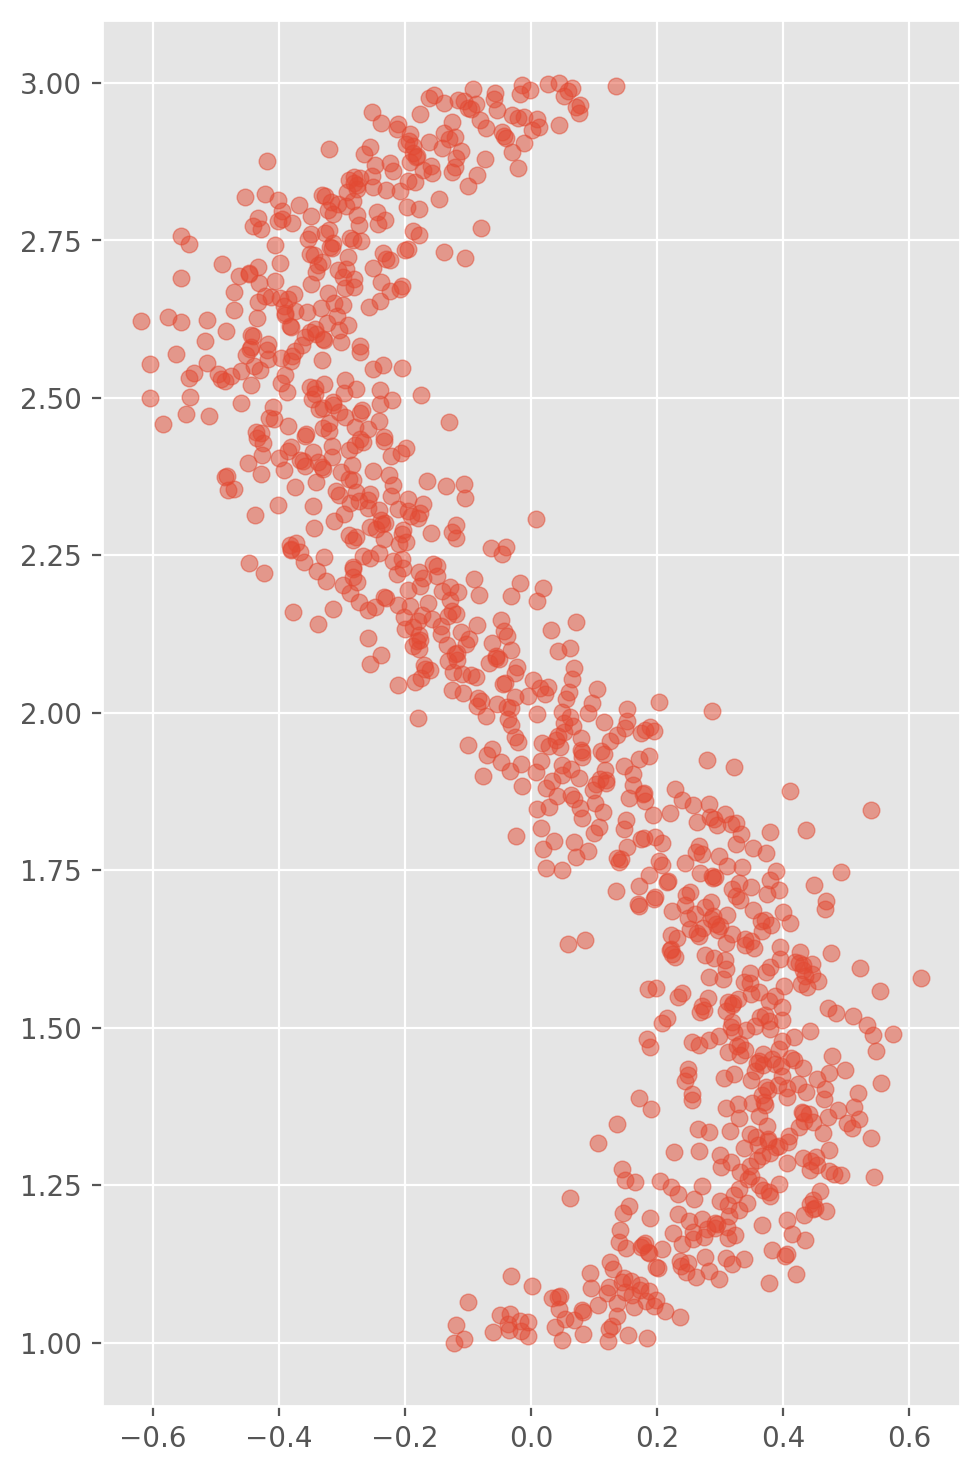

In [26]:
# Artificial data preparation

samples = 1_000
noise = normal.rvs(loc=0, scale=0.1, size=samples)

# Circle
phi = 2 * np.pi * np.random.random(samples)
x = (1 + noise) * np.cos(phi)
y = (1 + noise) * np.sin(phi)

# Parabola
x = np.linspace(-1, 1, samples)
y = x**2 + noise
x, y = y, x

# S - shape
x = np.linspace(1, 3, samples)
y = (x - 1) * (x - 2) * (x - 3) + noise
x, y = y, x

X = np.hstack((x.reshape(-1, 1), y.reshape(-1, 1)))
sc = MinMaxScaler()
X = sc.fit_transform(X)

plt.scatter(x, y, alpha=0.5)
plt.axis("scaled")
plt.show()

In [27]:
def kde(X, kernel=normal.pdf, h=0.1):
    from numpy.linalg import norm

    m, n = X.shape
    C = 1 / (m * h**n)
    return lambda x: C * np.sum(kernel(norm(((x - X) / h), axis=1)))

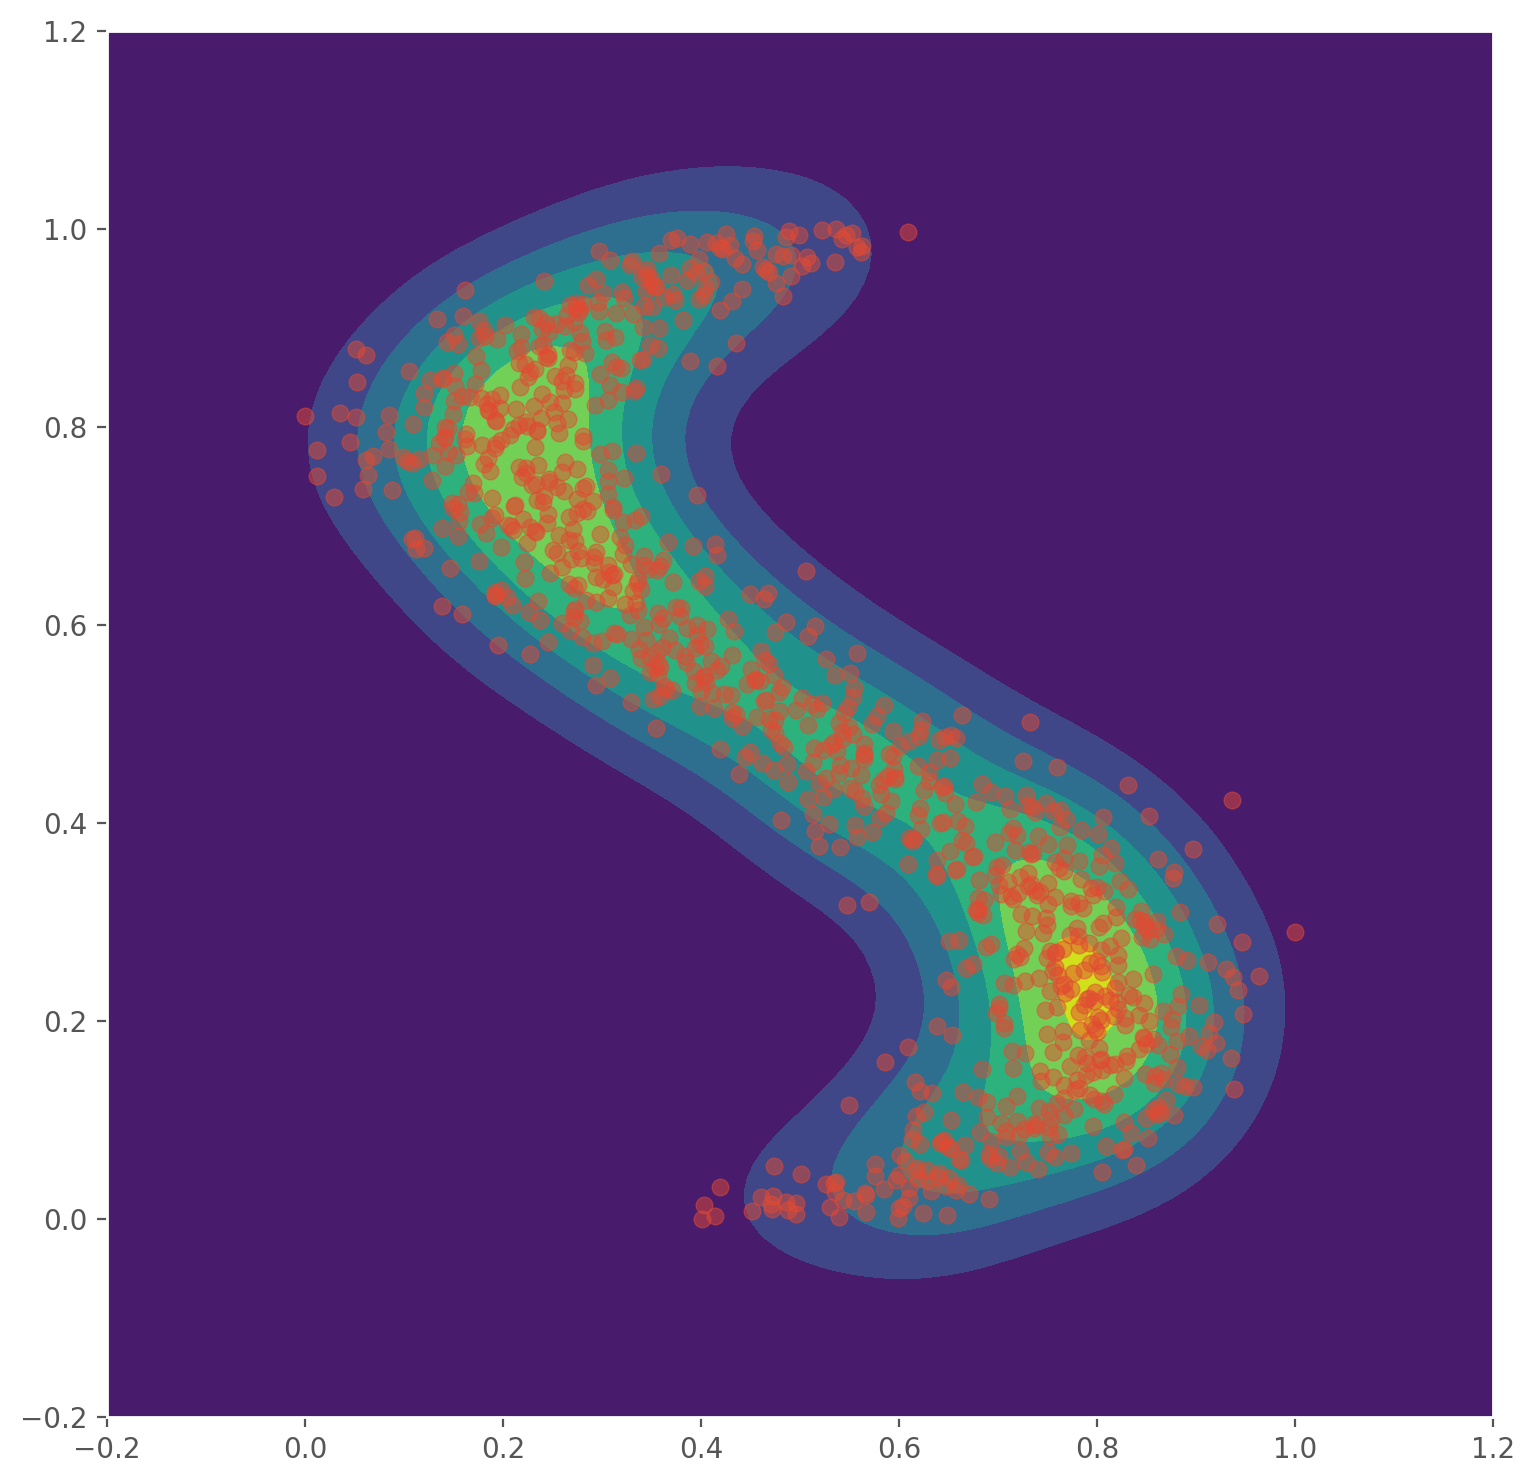

In [28]:
silverman_h = 1.06 * np.diag(np.cov(X.T)).mean() ** 0.5 * X.shape[0] ** (-0.2)
# https://espace.library.uq.edu.au/view/UQ:120006 (interesting approach)
p_hat = kde(X, h=silverman_h)
N = 100
xs = np.linspace(-0.2, 1.2, N)
ys = np.linspace(-0.2, 1.2, N)
zs = np.array([p_hat(np.array([[x, y]])) for x in xs for y in ys])
zs = zs.reshape(N, N).T
plt.contourf(xs, ys, zs)
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.axis("scaled")
plt.show()